In [220]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


In [221]:
from sklearn.datasets import load_boston
boston_dataset = load_boston()

In [222]:
print(boston_dataset.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


In [223]:
print(boston_dataset)

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]]), 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 1

In [224]:
df = pd.DataFrame(boston_dataset.data, columns = boston_dataset.feature_names)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [225]:
df['MEDV'] = boston_dataset.target
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [226]:
#no null values
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

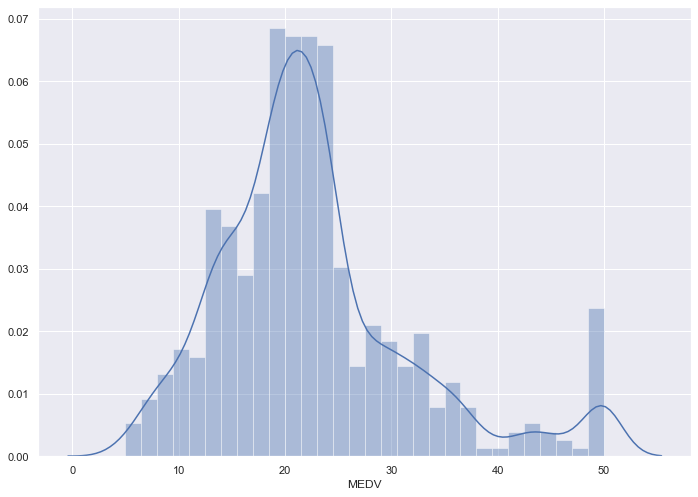

In [227]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(df['MEDV'], bins=30)
plt.show()

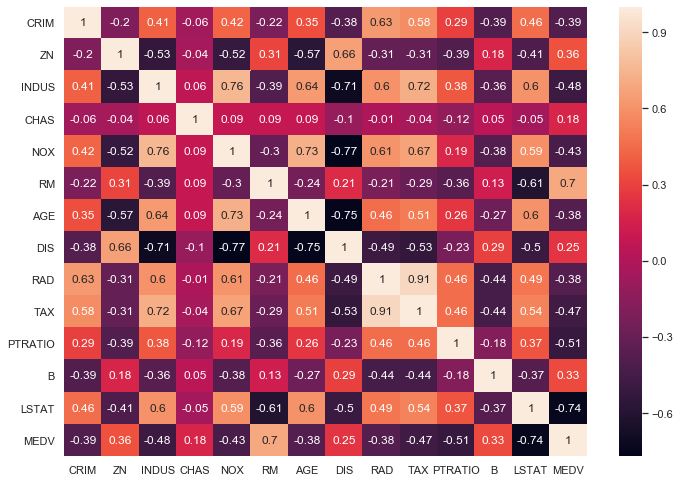

In [228]:
corelation_matrix = df.corr().round(2)
sns.heatmap(data = corelation_matrix, annot = True)

Text(0, 0.5, 'MEDV')

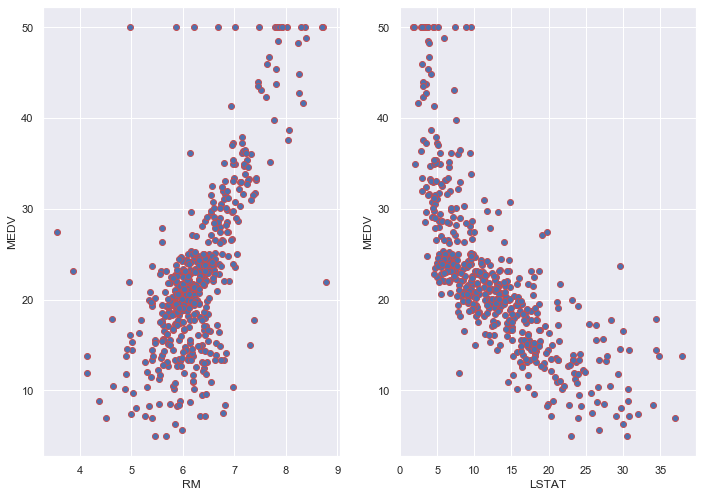

In [229]:
# from the heat map we determine that features RM and LSTAT are positively correlated and negatively correlated respectively
# other features are not that related to the target variable i.e., MEDV. Hence, we select RM and LSTAT as our final regression variable
plt.subplot(1,2,1)
plt.scatter(df.RM, df.MEDV, edgecolors = 'r')
plt.xlabel('RM')
plt.ylabel('MEDV')

plt.subplot(1,2,2)
plt.scatter(df.LSTAT, df.MEDV, edgecolors = 'r')
plt.xlabel('LSTAT')
plt.ylabel('MEDV')

In [230]:

df = df[df.MEDV < 40]
df = df[df.LSTAT < 25]
df = df[df.RM > 5]

Text(0, 0.5, 'MEDV')

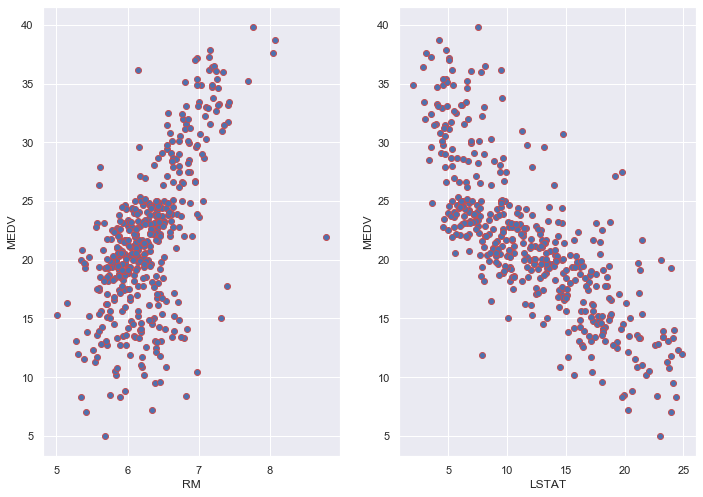

In [231]:
plt.subplot(1,2,1)
plt.scatter(df.RM, df.MEDV, edgecolors = 'r')
plt.xlabel('RM')
plt.ylabel('MEDV')

plt.subplot(1,2,2)
plt.scatter(df.LSTAT, df.MEDV, edgecolors = 'r')
plt.xlabel('LSTAT')
plt.ylabel('MEDV')

In [232]:
X = pd.DataFrame(np.c_[df.LSTAT, df.RM], columns = ['LSTAT', 'RM'])
y = df.MEDV

In [233]:
y.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: MEDV, dtype: float64

In [234]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 5)


In [235]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [236]:
from sklearn.metrics import r2_score
y_train_predict = model.predict(X_train)
r2score = r2_score(y_train, y_train_predict)

In [237]:
r2score

0.6620069553922597

In [238]:
y_predict = model.predict(X_test)
r2 = r2_score(y_test, y_predict)
r2

0.6611314403488657

In [239]:
model.coef_

array([-0.69401179,  4.03646529])

In [240]:
model.intercept_

5.03305093673783